**This notebook was modeled after taking over the EDA of the [link]().**  
Modeling conducted a total of four regression analysis models.
  
  
`LinearRegressor` conducted modeling after additional MinMax Scaling.  
The remaining three models (`LightGBMRegressor`, `XGBoostRegressor`, and `CatBoostRegressor`) were tree-based models that were modeled without scaling.

## Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from lightgbm import LGBMRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


## Visualization Initialization

In [2]:
# Define the base color (Airbnb-like color)
base_color = "#FF5733"

# Create a gradient color palette with 10 colors
grad_palette = sns.light_palette(base_color, n_colors=10, input="hex", reverse=True)

# Set the Seaborn style and custom gradient color palette
sns.set(style="whitegrid")
sns.set_palette(grad_palette)

## 01. Read Data

`Note` In our opinion, `host_id` can be affect to decide price. **So, We do not remove `host_id`.** 
- It is beacause each host has a different house, and the price is determined by the condition of the house.
- So, We judge it can be important feature for deciding house price.

In [3]:
linear_regressor_df =  pd.read_csv('./airbnb_preprocessing_data.csv')
cat_boosting_df = pd.read_csv('./airbnb_preprocessing_data_for_cat.csv')
boosting_df = pd.read_csv('./airbnb_preprocessing_data.csv')


In [4]:
linear_regressor_df.columns

Index(['host_id', 'price', 'minimum_nights', 'number_of_reviews',
       'calculated_host_listings_count', 'availability_365', 'gym', 'pool',
       'view', 'park', 'new', 'ext_opt_cnt', 'last_review_year',
       'neighbourhood_group_Bronx', 'neighbourhood_group_Brooklyn',
       'neighbourhood_group_Manhattan', 'neighbourhood_group_Queens',
       'neighbourhood_group_Staten Island', 'room_type_Entire home/apt',
       'room_type_Hotel room', 'room_type_Private room',
       'room_type_Shared room'],
      dtype='object')

`Note` 

In [5]:
linear_regressor_df.drop('number_of_reviews', axis = 1, inplace = True )
cat_boosting_df.drop('number_of_reviews', axis = 1, inplace = True )
boosting_df.drop('number_of_reviews', axis = 1, inplace = True )

In [6]:
cat_boosting_df['ext_opt_new'].fillna('',inplace = True)

In [7]:
def print_null_ratio(df:pd.DataFrame):
    
    columns = df.columns

    for c in columns :

        null_cnt = df[df[c].isnull()].count()['host_id']
        whole_cnt = df['host_id'].count()
        print( f"{c}의 null Ratio { round(null_cnt / whole_cnt,4) * 100} %" )

In [8]:
print_null_ratio(cat_boosting_df)

host_id의 null 비율 0.0 %
neighbourhood_group의 null 비율 0.0 %
room_type의 null 비율 0.0 %
neighbourhood의 null 비율 0.0 %
price의 null 비율 0.0 %
minimum_nights의 null 비율 0.0 %
calculated_host_listings_count의 null 비율 0.0 %
availability_365의 null 비율 0.0 %
ext_opt_new의 null 비율 0.0 %
ext_opt_cnt의 null 비율 0.0 %
last_review_year의 null 비율 0.0 %


In [9]:
print_null_ratio(boosting_df)

host_id의 null 비율 0.0 %
price의 null 비율 0.0 %
minimum_nights의 null 비율 0.0 %
calculated_host_listings_count의 null 비율 0.0 %
availability_365의 null 비율 0.0 %
gym의 null 비율 0.0 %
pool의 null 비율 0.0 %
view의 null 비율 0.0 %
park의 null 비율 0.0 %
new의 null 비율 0.0 %
ext_opt_cnt의 null 비율 0.0 %
last_review_year의 null 비율 0.0 %
neighbourhood_group_Bronx의 null 비율 0.0 %
neighbourhood_group_Brooklyn의 null 비율 0.0 %
neighbourhood_group_Manhattan의 null 비율 0.0 %
neighbourhood_group_Queens의 null 비율 0.0 %
neighbourhood_group_Staten Island의 null 비율 0.0 %
room_type_Entire home/apt의 null 비율 0.0 %
room_type_Hotel room의 null 비율 0.0 %
room_type_Private room의 null 비율 0.0 %
room_type_Shared room의 null 비율 0.0 %


## 03. Modeling
- LinearRegressor
- LightGBMRegressor
- XGBoostRegressor
- CatBoostRegressor

### 1 ) Linear Regression

,host_id,price,minimum_nights,calculated_host_listings_count,availability_365,gym,pool,view,park,new,...,last_review_year,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,0.000002,0.161105,0.023219,0.00381,0.860274,0.0,0.0,0.0,0.0,0.0,...,0.999506,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.000011,0.304948,0.047238,0.00000,0.495890,0.0,0.0,0.0,0.0,0.0,...,0.999506,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.000014,0.327963,0.002402,0.00000,0.002740,0.0,0.0,1.0,0.0,0.0,...,0.999506,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.000028,0.081703,0.023219,0.00000,0.567123,0.0,0.0,0.0,0.0,0.0,...,1.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.000198,0.276180,0.021617,0.00000,0.221918,0.0,0.0,0.0,1.0,0.0,...,0.999506,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [11]:
y = linear_regressor_df['price']
linear_regressor_df = linear_regressor_df.drop('price',axis = 1)


In [ ]:
minMaxScaler = MinMaxScaler()
minMaxScaler.fit(linear_regressor_df)
train_data_minMaxScaled = minMaxScaler.transform(linear_regressor_df)
linear_regressor_df = pd.DataFrame(train_data_minMaxScaled, columns=linear_regressor_df.columns, index=list(linear_regressor_df.index.values))
linear_regressor_df.head()

In [12]:
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(linear_regressor_df, y, test_size=0.2, random_state=42)

Mean Squared Error: 0.004840937765980818
R-squared: 0.45255485041397225


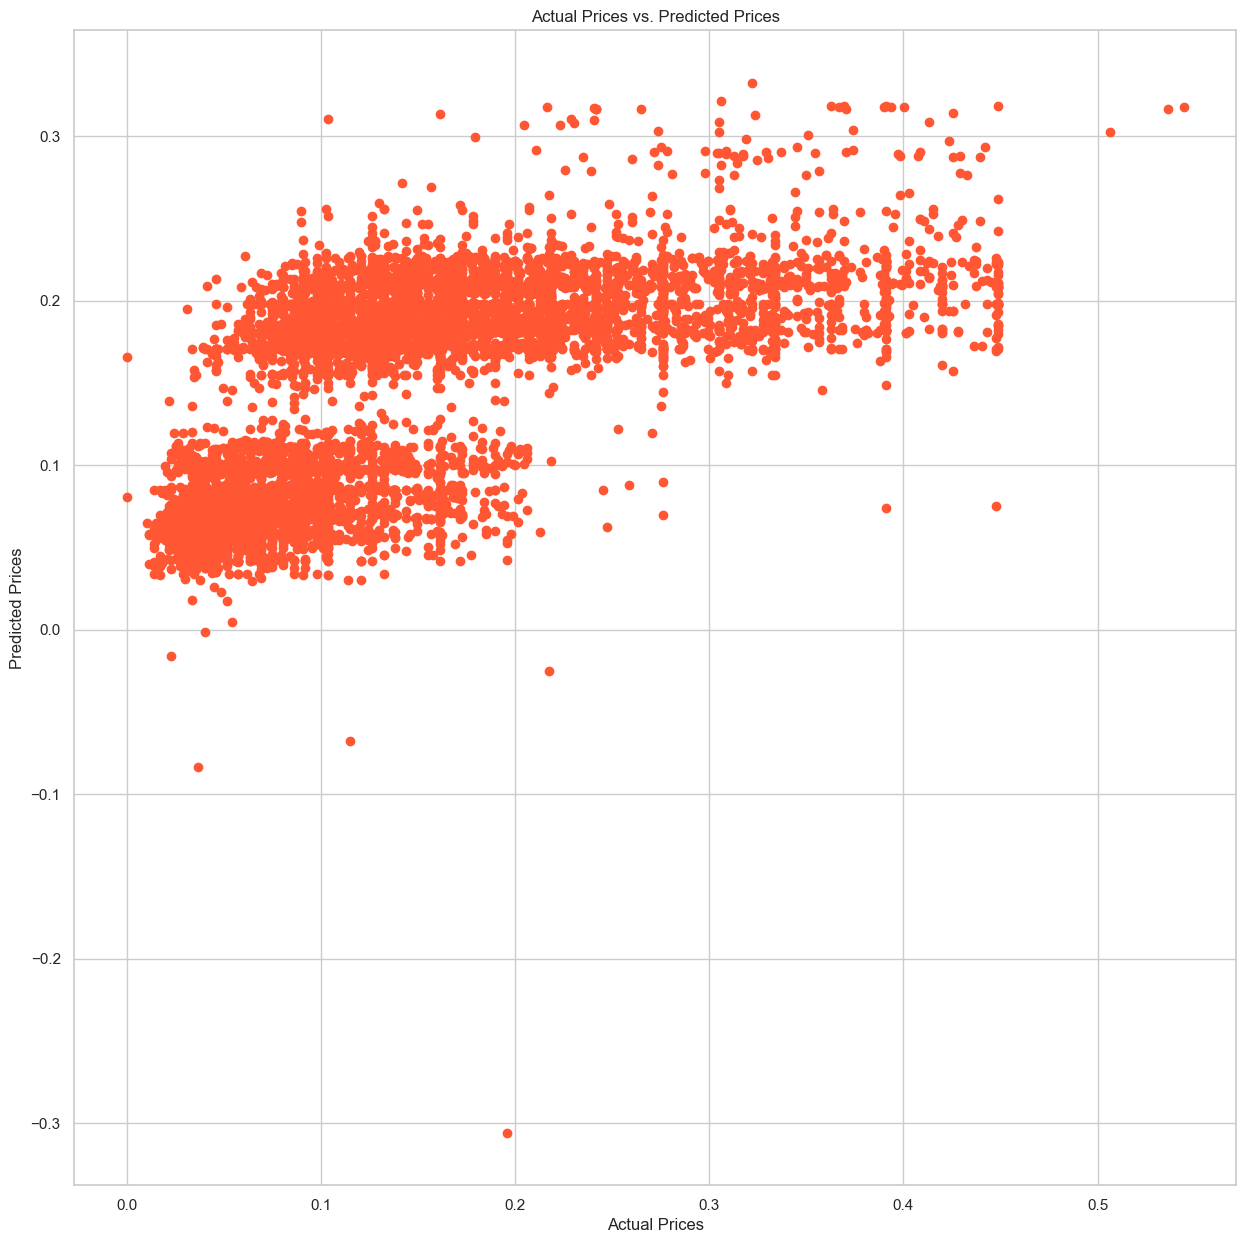

In [13]:

# Create a LinearRegression model
lr_model = LinearRegression()

# Fit the model to the data
lr_model.fit(X_train_lr, y_train_lr)

# Get the coefficients (slope and intercept)
slope = lr_model.coef_[0]
intercept = lr_model.intercept_

# Predict using the model
y_pred = lr_model.predict(X_test_lr)
y_pred 


# Predict Test Data
y_pred = lr_model.predict(X_test_lr)

# Calculate evaluation value 
mse = mean_squared_error(y_test_lr, y_pred)
r2 = r2_score(y_test_lr, y_pred)

print('Mean Squared Error:', mse)
print('R-squared:', r2)

# Visualize predict value and target value
plt.figure(figsize =(15,15))
plt.scatter(y_test_lr, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs. Predicted Prices')
plt.show()



In [14]:
y_pred.max()

0.33248138427734375

In [15]:
y_pred.min()

-0.30582427978515625

### 2 ) LightGBM

In [16]:
lgbm_y = boosting_df['price']
lgbm_boosting_df = boosting_df.drop('price', axis = 1)


In [17]:
X_train_lgbm, X_test_lgbm, y_train_lgbm, y_test_lgbm = train_test_split(lgbm_boosting_df, lgbm_y, test_size=0.2, random_state=42)

In [18]:
hyper_params = {'random_state':42, 
                'metric':'r2_score', 
                'learning_rate': 0.1,
                "num_iterations": 200,}

In [19]:
lgb = LGBMRegressor(**hyper_params)

lgb.fit(X_train_lgbm, y_train_lgbm,
        eval_set=[(X_test_lgbm, y_test_lgbm)],
        eval_metric='r2_score')

from sklearn.metrics import r2_score
pred = lgb.predict(X_test_lgbm)
print('r2: {0:.5f}'.format(r2_score(y_test_lgbm, pred)))

C:\Users\catti\Anaconda2\envs\openai_dev\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001330 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 669
[LightGBM] [Info] Number of data points in the train set: 30993, number of used features: 20
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 134.769690
r2: 0.53325


####  Check Feature Importance 
- Sale number 'host_id' is adopted as the main variable 
- Next, movies_per_month, calculated_host_listings_count, minimum_nights have an impact
- The tendency for house prices to increase when minimum_nights are large 
${\rightarrow}$ Airbnb may have been affected by calculating and showing at least one night * minimum applause

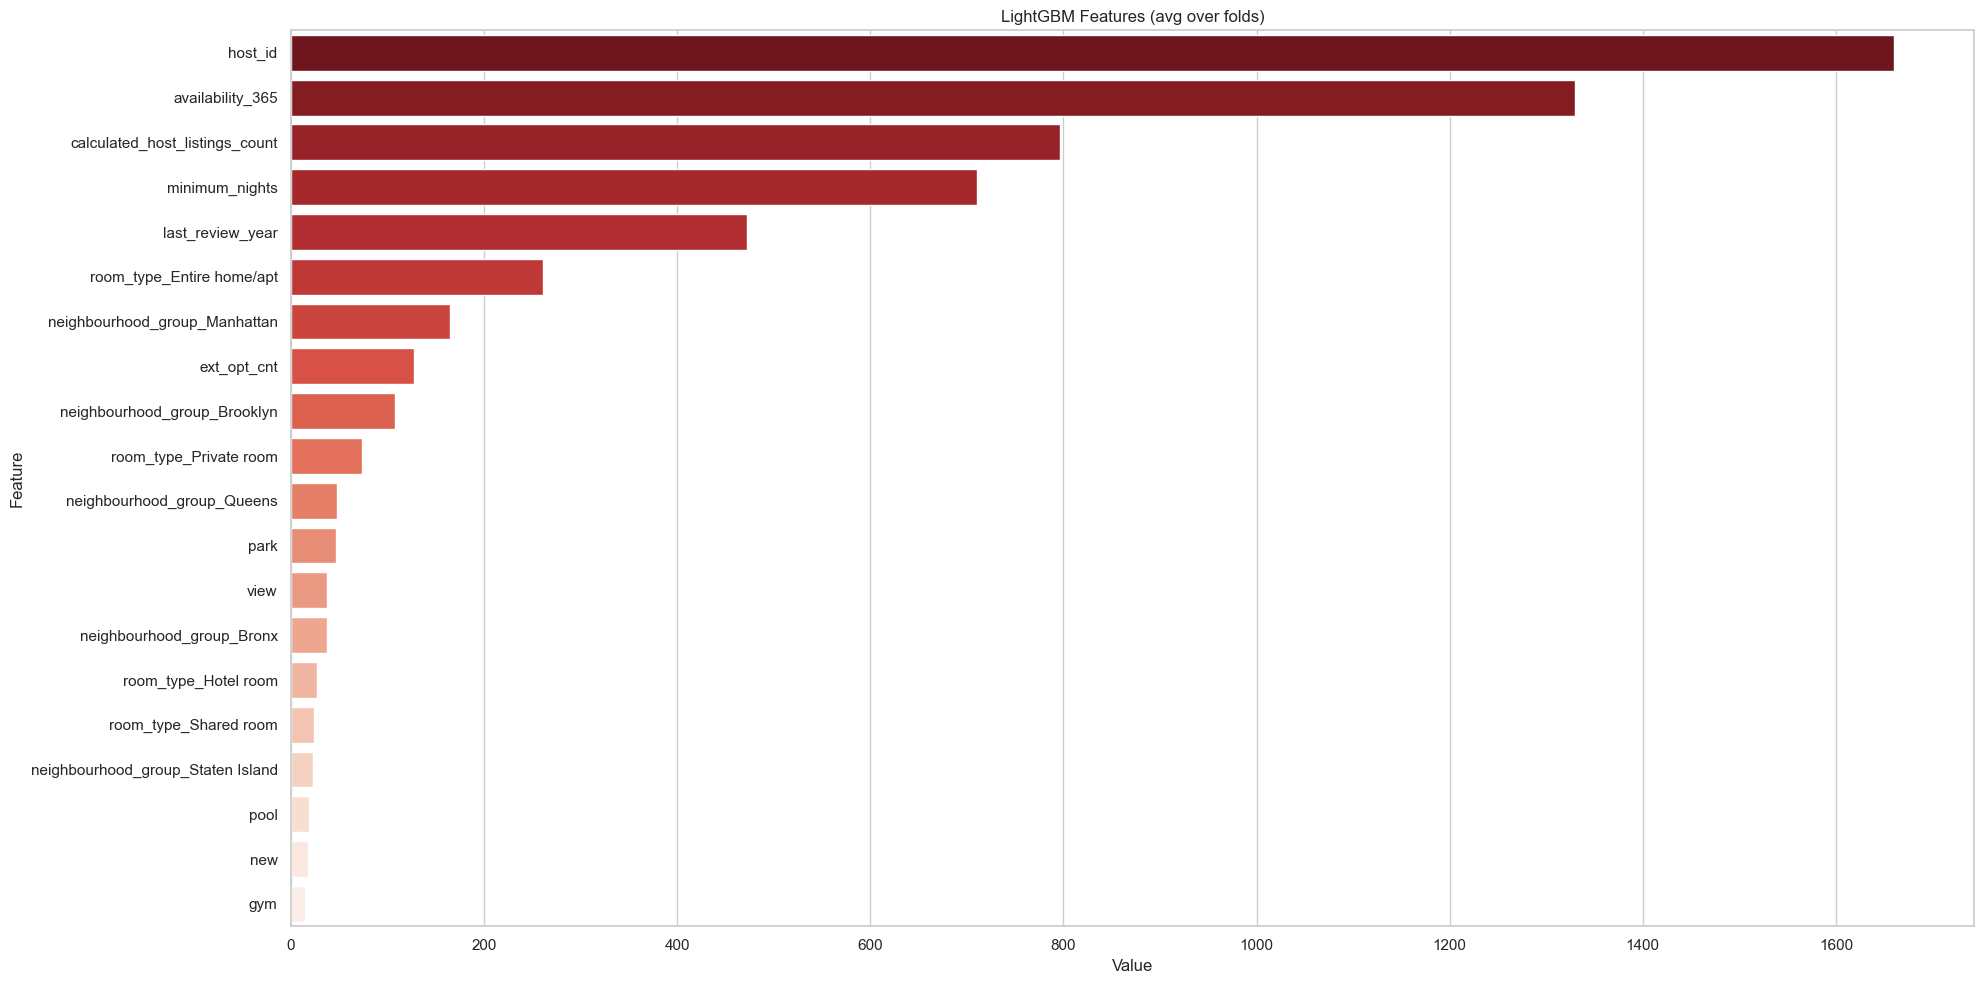

<Figure size 640x480 with 0 Axes>

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

feature_imp = pd.DataFrame(sorted(zip(lgb.feature_importances_,X_train_lgbm.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False), palette = "Reds_r")
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()
plt.savefig('lgbm_importances-01.png')

In [21]:
lgb.feature_importances_,X_train_lgbm.columns


(array([1660,  711,  797, 1330,   15,   19,   37,   47,   18,  127,  472,
          37,  108,  165,   48,   23,  261,   27,   74,   24]),
 Index(['host_id', 'minimum_nights', 'calculated_host_listings_count',
        'availability_365', 'gym', 'pool', 'view', 'park', 'new', 'ext_opt_cnt',
        'last_review_year', 'neighbourhood_group_Bronx',
        'neighbourhood_group_Brooklyn', 'neighbourhood_group_Manhattan',
        'neighbourhood_group_Queens', 'neighbourhood_group_Staten Island',
        'room_type_Entire home/apt', 'room_type_Hotel room',
        'room_type_Private room', 'room_type_Shared room'],
       dtype='object'))

### 3 ) XGBoost

In [22]:
xgb_y = boosting_df['price']
xgb_boosting_df = boosting_df.drop('price', axis = 1)


In [23]:
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(xgb_boosting_df, xgb_y, test_size=0.2, random_state=42)

In [24]:
# 기본 XGBRegressor 모델
from sklearn.metrics import r2_score
from xgboost import XGBRegressor

xgb = XGBRegressor(random_state=0)
xgb.fit(X_train_xgb, y_train_xgb)
pred = xgb.predict(X_test_xgb)

print('r2: {0:.5f}'.format(r2_score(y_test_xgb, pred)))



r2: 0.53116


### 4 ) CatBoostRegressor

In [25]:
from catboost import CatBoostRegressor, Pool, cv

In [26]:
cat_boosting_df.columns

Index(['host_id', 'neighbourhood_group', 'room_type', 'neighbourhood', 'price',
       'minimum_nights', 'calculated_host_listings_count', 'availability_365',
       'ext_opt_new', 'ext_opt_cnt', 'last_review_year'],
      dtype='object')

In [27]:
cat_boosting_df['ext_opt_new'] = cat_boosting_df['ext_opt_new'].apply(lambda x : x.split(' ')[0])

In [28]:
cat_boosting_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38742 entries, 0 to 38741
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         38742 non-null  int64  
 1   neighbourhood_group             38742 non-null  object 
 2   room_type                       38742 non-null  object 
 3   neighbourhood                   38742 non-null  object 
 4   price                           38742 non-null  int64  
 5   minimum_nights                  38742 non-null  int64  
 6   calculated_host_listings_count  38742 non-null  int64  
 7   availability_365                38742 non-null  int64  
 8   ext_opt_new                     38742 non-null  object 
 9   ext_opt_cnt                     38742 non-null  int64  
 10  last_review_year                38742 non-null  float64
dtypes: float64(1), int64(6), object(4)
memory usage: 3.3+ MB


In [29]:
cat_model = CatBoostRegressor(iterations=3000, learning_rate = 0.15, loss_function='RMSE')

In [30]:
cat_y = cat_boosting_df['price']
cat_train_df = cat_boosting_df.drop('price',axis = 1)


In [31]:
cat_col = []

for c in cat_train_df.columns:
    if ( 'object'== cat_train_df[c].dtype):
        cat_col.append(c)


<Axes: xlabel='price', ylabel='Density'>

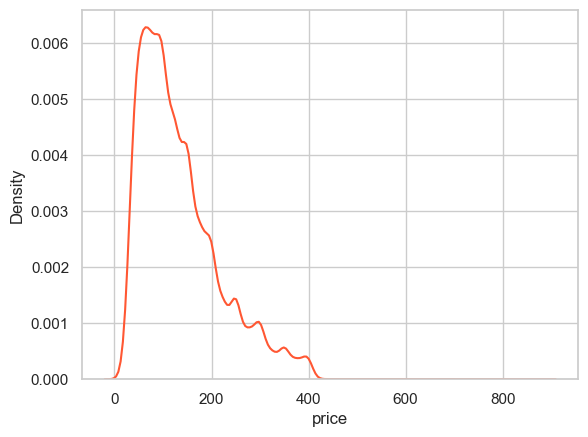

In [32]:
sns.kdeplot(cat_y)

In [33]:
print(cat_y.skew())

1.1429924938073672


In [34]:
print(cat_y.kurt())

1.089343614220995


In [35]:
X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split( cat_train_df, cat_y, test_size=0.2, random_state=42)

In [36]:
# #To show plots
# from ipywidgets import interact  
# import ipywidgets as widgets  

In [37]:
cat_model.fit(    #    train_data,  #   Tried this with pooled data defined above2
    X_train_cat,
    y_train_cat,
    cat_features=cat_col,
    eval_set=(X_test_cat, y_test_cat),
    verbose=100,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 77.1826289	test: 76.0453740	best: 76.0453740 (0)	total: 242ms	remaining: 12m 4s
100:	learn: 53.3203177	test: 53.8063340	best: 53.8063340 (100)	total: 6.27s	remaining: 3m
200:	learn: 52.2310505	test: 53.3464500	best: 53.3464500 (200)	total: 12.2s	remaining: 2m 49s
300:	learn: 51.3536944	test: 53.2243985	best: 53.2230674 (298)	total: 18.2s	remaining: 2m 42s
400:	learn: 50.6333079	test: 53.1240140	best: 53.1184410 (383)	total: 24.4s	remaining: 2m 38s
500:	learn: 50.0508844	test: 53.0385910	best: 53.0345718 (483)	total: 30.3s	remaining: 2m 31s
600:	learn: 49.5177328	test: 53.0152442	best: 53.0047461 (594)	total: 36.4s	remaining: 2m 25s
700:	learn: 49.0041438	test: 52.9919895	best: 52.9821448 (696)	total: 42.9s	remaining: 2m 20s
800:	learn: 48.5631847	test: 52.9743938	best: 52.9743938 (800)	total: 49.1s	remaining: 2m 14s
900:	learn: 48.0947959	test: 52.9816962	best: 52.9686792 (804)	total: 55.5s	remaining: 2m 9s
1000:	learn: 47.6729339	test: 52.9623542	best: 52.9623542 (1000)	tota

In [38]:
y_pred = cat_model.predict(X_test_cat)


In [39]:
mean_squared_error((y_test_cat), y_pred)

2803.9825044456247

In [40]:
r2_score((y_test_cat), y_pred)

0.5800990479166758

In [41]:
y_test_cat

217      220
28198     70
8279     150
19020    149
8920     249
        ... 
1647     123
1087     149
24279    105
1370     129
22309     75
Name: price, Length: 7749, dtype: int64

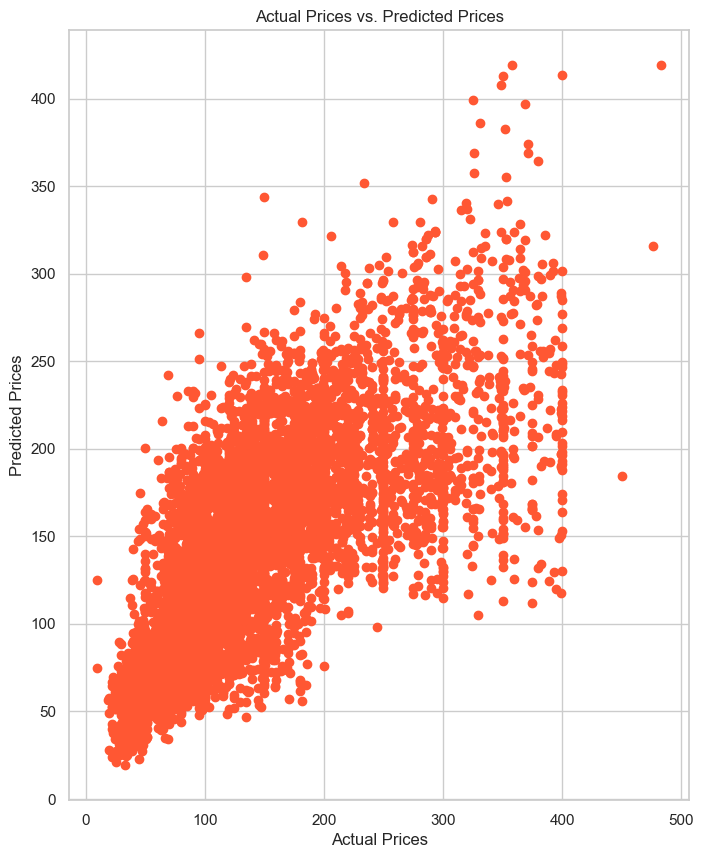

In [42]:
# 실제 값과 예측 값 시각화
plt.figure(figsize =(8,10))
plt.scatter(y_test_cat, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs. Predicted Prices')
plt.show()



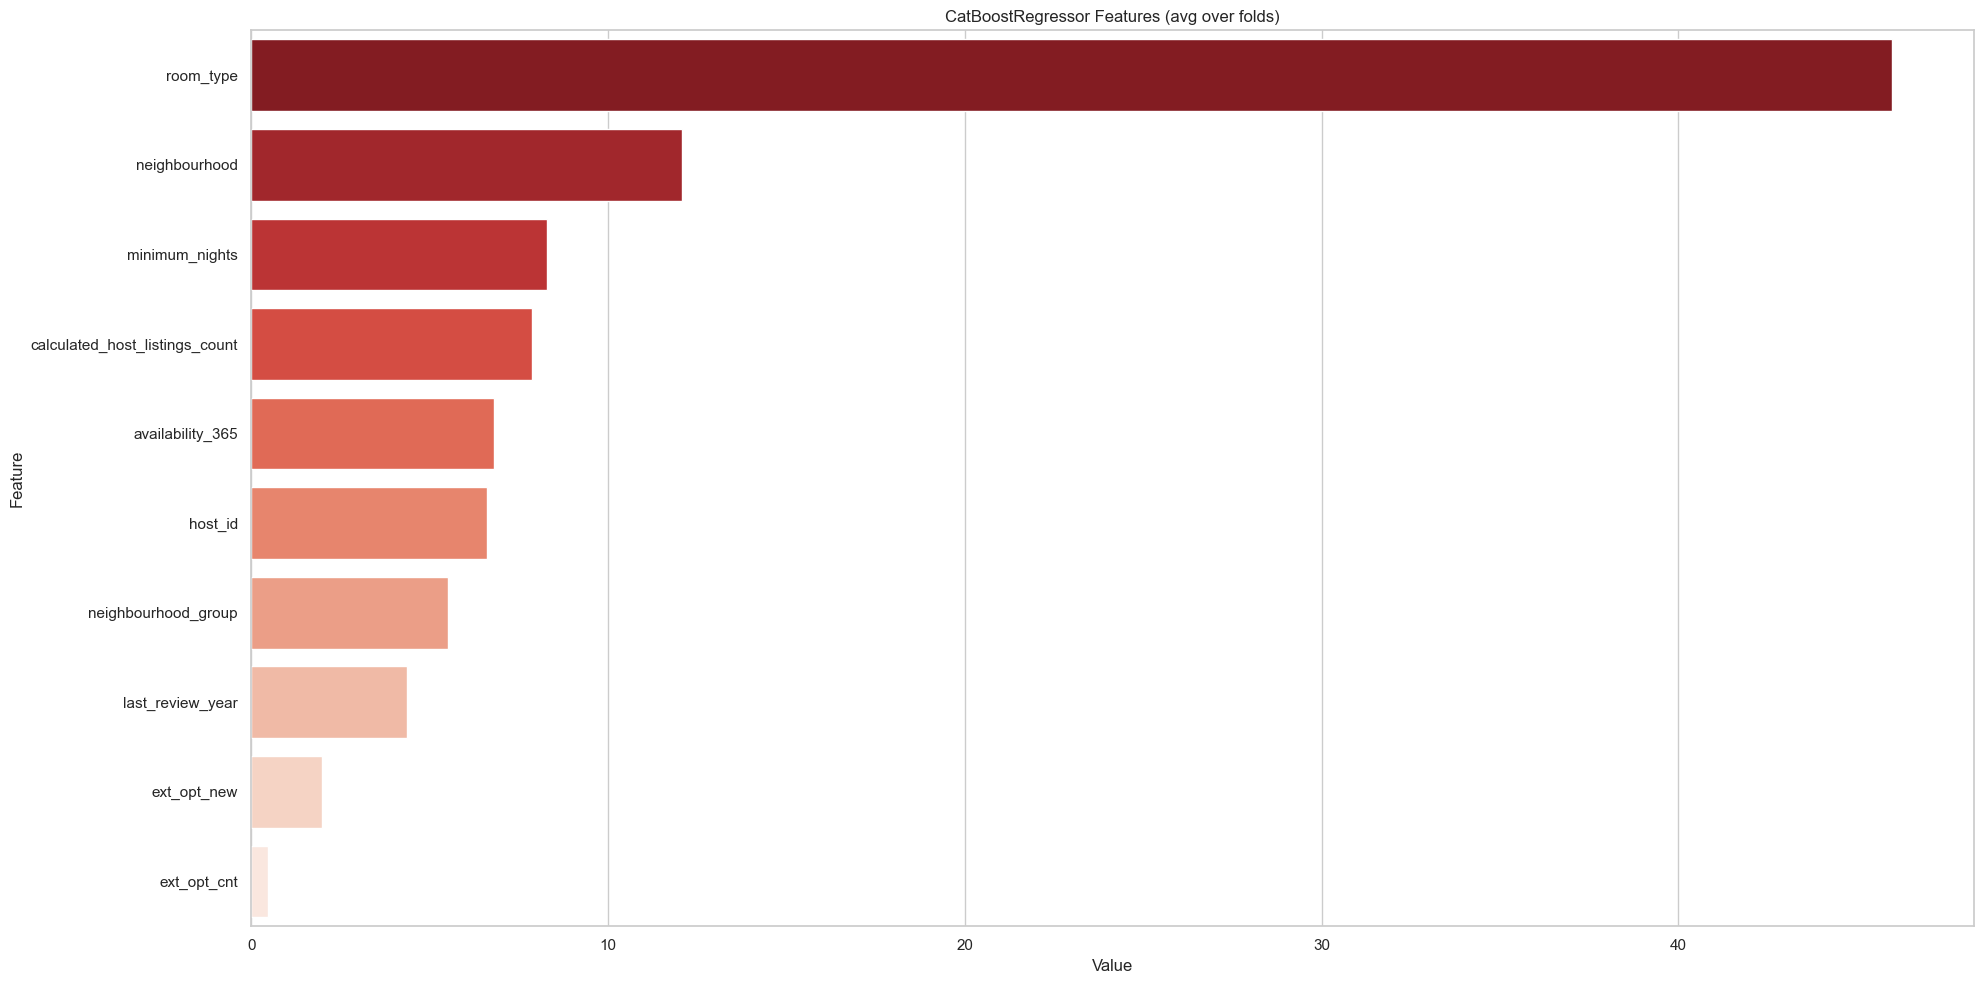

<Figure size 640x480 with 0 Axes>

In [43]:
warnings.simplefilter(action='ignore', category=FutureWarning)

# sorted(zip(clf.feature_importances_, X.columns), reverse=True)
feature_imp = pd.DataFrame(sorted(zip(cat_model.feature_importances_,X_train_cat.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False), palette = "Reds_r")
plt.title('CatBoostRegressor Features (avg over folds)')
plt.tight_layout()
plt.show()
plt.savefig('cb_importances-01.png')

**Modeling Result**


| 모델명 | r2 score | r2 score (MinMax Scaling) |
| -------- | -------- | -------- |
| LinearRegressor     | 0.45    | 0.45     |
| LightGBMRegressor     | 0.53     | -     |
| XGBoostRegressor     | 0.53     | -     |
| CatBoostRegressor     | 0.58     | -     |